In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv


In [2]:
df = pd.read_csv("/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.shape

(3900, 19)

In [5]:
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [8]:
df.drop(columns=['Customer ID'], inplace=True)

In [9]:
df.shape

(3900, 18)

In [10]:
object_cols=['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']
for i in object_cols:
    print(f'{i}:', df[i].unique(), "\n")

Gender: ['Male' 'Female'] 

Item Purchased: ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves'] 

Category: ['Clothing' 'Footwear' 'Outerwear' 'Accessories'] 

Location: ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan'] 

Size: ['L' 'S' 'M' 'XL'] 

Color: ['Gray' 'Maroon' 'Turquoise' 'White' 

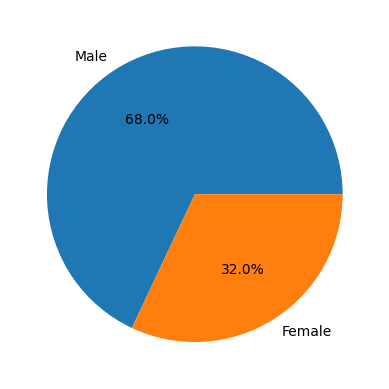

In [11]:
labels=['Male', 'Female']
plt.pie(df['Gender'].value_counts(), autopct='%1.1f%%', labels=labels)
plt.show()

### The above graph is important because we can see the distribution of genders. We are getting more male customers, which means we have to serve our male customers and meet their needs in order to retain them. We are getting very few female customers which means we have to focus on our inventory and do some competition analysis to find out what the other competitors are selling so that we can keep those brands/SKUs and increase our female customer base and serve their needs as well

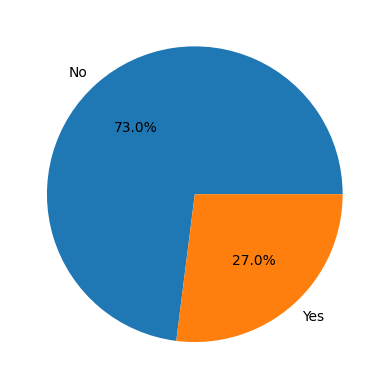

In [12]:
labels=['No', 'Yes']
plt.pie(df['Subscription Status'].value_counts(), autopct='%1.1f%%', labels=labels)
plt.show()

### The above graph is important because of RFM (Recency, Frequency and Monetary) analysis in retail. In order to retain the customers and enroll them for loyalty programs we have to make more subscriptions. These days, we see most of the companies push their customers to go for the master cards or loyalty cards so that the companies can retain the customers by giving personalized recommendations to the customers by giving them discounts etc and build a loyal customer base

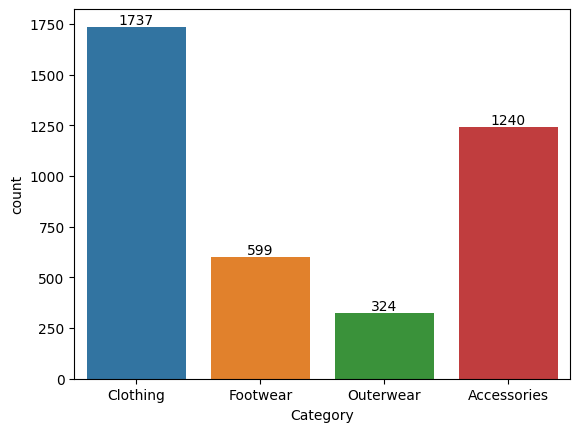

In [13]:
ax=sns.countplot(x='Category', data=df)
for bars in ax.containers:
    plt.bar_label(bars)
plt.show()

### The above graph is important because we want to see why customers are coming to our store. We see that a lot of people come to buy clothes and accessories. We can run promotions or give discounts to the customers for footwear and outerwear so that we can sell more of our inventory and work on KPIs like sell-through rate, inventory turnover, etc. Also, it is important to do a competition analysis to understand why the customers are coming to our store for footwear and outerwear and why they are going to the competition. Potential reasons could be: 
### 1. Good discounts
### 2. More variety/Width of products
### 3. More depth of products example kids, youth, adults, old etc.

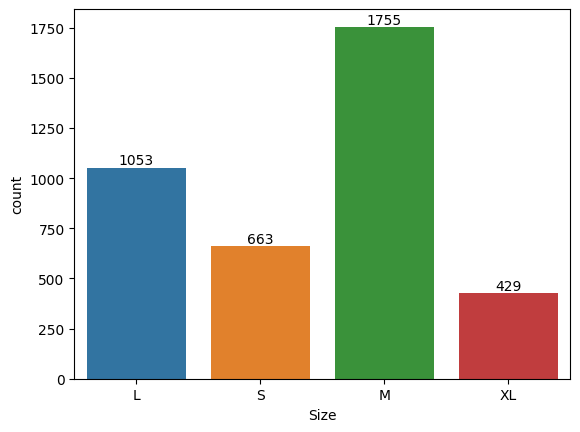

In [14]:
ax=sns.countplot(x='Size', data=df)
for bars in ax.containers:
    plt.bar_label(bars)
plt.show()

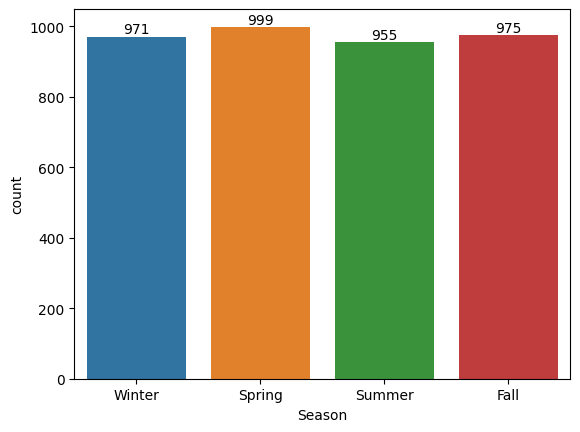

In [15]:
ax=sns.countplot(x='Season', data=df)
for bars in ax.containers:
    plt.bar_label(bars)
plt.show()

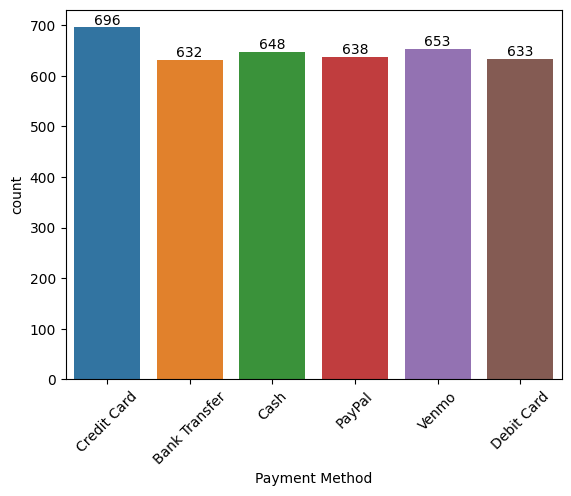

In [16]:
ax=sns.countplot(x='Payment Method', data=df)
for bars in ax.containers:
    plt.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

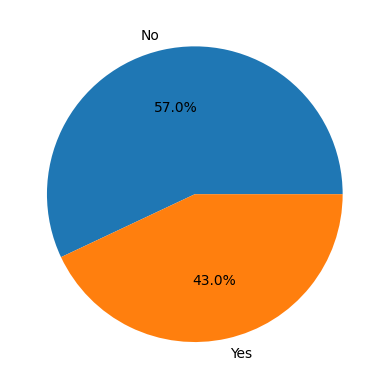

In [17]:
labels=['No', 'Yes']
plt.pie(df['Discount Applied'].value_counts(), autopct='%1.1f%%', labels=labels)
plt.show()

### The above graph is important to understand that when most of our customers are coming to the store and making the purchases.

In [18]:
sum_sales_by_location=df.groupby(['Location'], as_index=False).agg({'Purchase Amount (USD)': 'sum'}).sort_values(by='Purchase Amount (USD)', ascending=False)

In [19]:
sum_sales_by_location.head(10)

,Location,Purchase Amount (USD)
25,Montana,5784
12,Illinois,5617
4,California,5605
11,Idaho,5587
27,Nevada,5514
0,Alabama,5261
31,New York,5257
33,North Dakota,5220
47,West Virginia,5174
26,Nebraska,5172


In [20]:
sum_sales_by_location.tail(10)

,Location,Purchase Amount (USD)
6,Connecticut,4226
5,Colorado,4222
28,New Hampshire,4219
14,Iowa,4201
48,Wisconsin,4196
38,Rhode Island,3871
29,New Jersey,3802
8,Florida,3798
10,Hawaii,3752
15,Kansas,3437


### The above two dataframes are important to understand which location is giving us the best sale and which is giving the worst. By this, we can strategize the sales by location. For example, for the top-selling store, we can work on the inventory because the inventory turnover could be high. We can also use ML algorithms to predict the sales of the store and use regression analysis to keep the stock in the inventory and not disappoint the customers. For the location where we have the lowest sales, we have to understand why the sales are low. Potential reasons could be:
### 1. Do we have sufficient inventory?
### 2. Is the inventory managed properly
### 3. Are the associates or leads talking to the customers properly and educating them about the products?
### 4. Is the POS system working properly?
### 5. Understanding the demographics of location to fulfill the needs of the customers who visit the store. 

In [21]:
sales_by_category_and_location=df.groupby(['Location', 'Category'], as_index=False).agg({'Purchase Amount (USD)': 'sum'}).sort_values(by='Purchase Amount (USD)', ascending=False)
sales_by_category_and_location.head(10)

,Location,Category,Purchase Amount (USD)
101,Montana,Clothing,2768
17,California,Clothing,2740
69,Louisiana,Clothing,2562
89,Minnesota,Clothing,2518
109,Nevada,Clothing,2515
49,Illinois,Clothing,2508
45,Idaho,Clothing,2472
141,Oklahoma,Clothing,2464
177,Vermont,Clothing,2426
13,Arkansas,Clothing,2413


### The above graph is important to understand in which location which category is doing good. We can see that the Clothing is doing really well and is in the top 10 of different stores. The location Montana is doing really well in that category 

In [22]:
sales_by_category_and_location[sales_by_category_and_location['Category']=='Footwear'].head(10)

,Location,Category,Purchase Amount (USD)
138,Ohio,Footwear,1321
90,Minnesota,Footwear,1073
74,Maine,Footwear,1013
86,Michigan,Footwear,1000
78,Maryland,Footwear,943
178,Vermont,Footwear,942
182,Virginia,Footwear,939
106,Nebraska,Footwear,923
2,Alabama,Footwear,914
58,Iowa,Footwear,863


### For Footwear, store in the Ohio location is doing well and giving the highest sales

In [23]:
sales_by_category_and_location[sales_by_category_and_location['Category']=='Accessories'].head(10)

,Location,Category,Purchase Amount (USD)
104,Nebraska,Accessories,2147
108,Nevada,Accessories,2130
92,Mississippi,Accessories,1986
188,West Virginia,Accessories,1907
64,Kentucky,Accessories,1898
164,Tennessee,Accessories,1863
48,Illinois,Accessories,1854
16,California,Accessories,1845
100,Montana,Accessories,1797
44,Idaho,Accessories,1769


In [24]:
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [25]:
df_age=df.copy()

In [26]:
print("Minimum age in the dataset:", df['Age'].min())
print("Maximum age in the dataset:", df['Age'].max())

Minimum age in the dataset: 18
Maximum age in the dataset: 70


In [27]:
df_age['Age_Bracket'] = df_age['Age'].apply(
    lambda x: "18-30" if x < 30 else "30-45" if 30 <= x < 45 else "45-70"
)

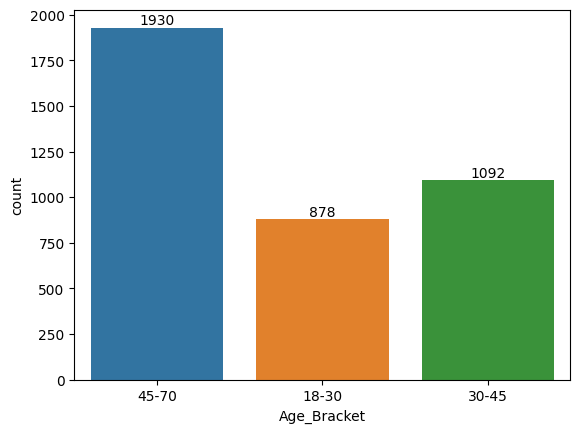

In [28]:
ax=sns.countplot(x='Age_Bracket', data=df_age)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

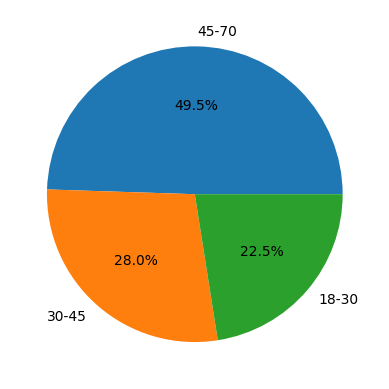

In [29]:
labels=['45-70', '30-45', '18-30']
plt.pie(df_age['Age_Bracket'].value_counts(), autopct='%1.1f%%', labels=labels)
plt.show()

### Almost 50% of the customers are in the age bracket of 45-70. To bring in more customers, we have to understand the other two age categories as well. By checking the inventory to see whether we have sufficient stuff available at our stores. Competition analysis to understand why customers aged < 45 are going to the competitors. Using effective marketing strategies to educate the customers about the width and depth of our products. Loyalty and Master cards can help retain and bring new customers. Giving good discounts on promotional days like Black Friday, Cyber Monday, Boxing Day etc.

In [30]:
print("Maximum Rating in the dataset:", df['Review Rating'].max())
print("Minimum Rating in the dataset:", df['Review Rating'].min())

Maximum Rating in the dataset: 5.0
Minimum Rating in the dataset: 2.5


In [31]:
category_avg_rating=df.groupby(['Category'], as_index=False).agg({'Review Rating': 'mean'}).sort_values(by='Review Rating', ascending=False)
category_avg_rating

,Category,Review Rating
2,Footwear,3.790651
0,Accessories,3.768629
3,Outerwear,3.746914
1,Clothing,3.723143


#### The above table is important to see which category has the highest average rating and which has the lowest. All the categories have almost the same rating, which is a good sign. However, we have to increase the sales of categories like Footwear, Accessories, and Outerwear because Clothing has the highest amount of customers

In [32]:
total_sales_by_category=df.groupby(['Category'], as_index=False).agg({'Purchase Amount (USD)': 'sum'}).sort_values(by='Purchase Amount (USD)', ascending=False)
total_sales_by_category

,Category,Purchase Amount (USD)
1,Clothing,104264
0,Accessories,74200
2,Footwear,36093
3,Outerwear,18524


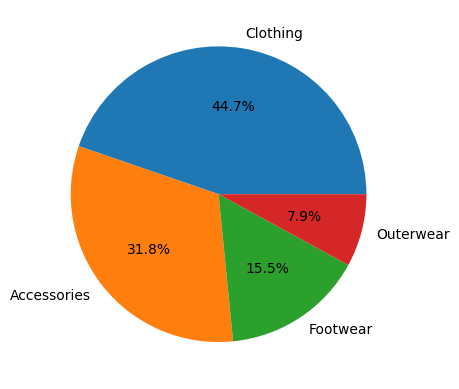

In [33]:
labels=total_sales_by_category['Category']
values=total_sales_by_category['Purchase Amount (USD)']
plt.pie(values, autopct='%1.1f%%', labels=labels)
plt.show()

In [34]:
total_sales_by_item_purchased=df.groupby(['Item Purchased', 'Category'], as_index=False).agg({'Purchase Amount (USD)': 'sum'}).sort_values(by='Purchase Amount (USD)', ascending=False)
total_sales_by_item_purchased.head(10)

,Item Purchased,Category,Purchase Amount (USD)
2,Blouse,Clothing,10410
16,Shirt,Clothing,10332
5,Dress,Clothing,10320
13,Pants,Clothing,10090
12,Jewelry,Accessories,10010
22,Sunglasses,Accessories,9649
1,Belt,Accessories,9635
15,Scarf,Accessories,9561
23,Sweater,Clothing,9462
18,Shorts,Clothing,9433


In [35]:
total_sales_by_item_purchased.tail(10)

,Item Purchased,Category,Purchase Amount (USD)
24,T-shirt,Clothing,9248
17,Shoes,Footwear,9240
14,Sandals,Footwear,9200
3,Boots,Footwear,9018
7,Handbag,Accessories,8857
9,Hoodie,Clothing,8767
0,Backpack,Accessories,8636
20,Sneakers,Footwear,8635
6,Gloves,Accessories,8477
11,Jeans,Clothing,7548


### The above table is important to see how the sub-categories of our products are doing. Even though clothing has the highest number of sales, but we see that 'Hoodie' and 'Jeans' contribute the lowest. We also saw that most of our customers lie within the age bracket of 45-70, i.e, these customers are least interested in the hoodie and jeans and most interested in pants, sweaters, shirts, dress etc.

In [36]:
season_total_sales=df.groupby(['Season'], as_index=False).agg({'Purchase Amount (USD)': 'sum'}).sort_values(by='Purchase Amount (USD)', ascending=False)
season_total_sales

,Season,Purchase Amount (USD)
0,Fall,60018
1,Spring,58679
3,Winter,58607
2,Summer,55777


### The highest revenue was generated in the fall season

In [37]:
season_total_sales_by_category=df.groupby(['Season', 'Category'], as_index=False).agg({'Purchase Amount (USD)': 'sum'}).sort_values(by='Purchase Amount (USD)', ascending=False)
season_total_sales_by_category

,Season,Category,Purchase Amount (USD)
5,Spring,Clothing,27692
13,Winter,Clothing,27274
1,Fall,Clothing,26220
9,Summer,Clothing,23078
0,Fall,Accessories,19874
8,Summer,Accessories,19028
12,Winter,Accessories,18291
4,Spring,Accessories,17007
6,Spring,Footwear,9555
10,Summer,Footwear,9393


### We can see that one category is dominating all the other three categories in all four seasons. Surprisingly, Outerwear is performing the best in the fall season, which means that either the customers are buying the outerwear products in the fall season or they are going to competitions to buy the outerwear products. It is a concerning issue because the outerwear sales should be the best in the winter season. We have to do the competition analysis and introduce promotions like Black Friday, Cyber Monday, and Boxing Day, etc, and educate customers about the discounts on our products.

### Let's drill the above analysis further to see which category is selling the best in which season

In [38]:
season_total_sales_by_sub_category=df.groupby(['Season', 'Category', 'Item Purchased'], as_index=False).agg({'Purchase Amount (USD)': 'sum'}).sort_values(by='Purchase Amount (USD)', ascending=False)
season_total_sales_by_sub_category.head(10)

,Season,Category,Item Purchased,Purchase Amount (USD)
4,Fall,Accessories,Hat,3224
42,Spring,Clothing,Sweater,3145
24,Fall,Outerwear,Jacket,3106
88,Winter,Clothing,Shirt,3102
82,Winter,Accessories,Sunglasses,3085
55,Summer,Accessories,Jewelry,3006
87,Winter,Clothing,Pants,2999
62,Summer,Clothing,Pants,2886
85,Winter,Clothing,Hoodie,2850
40,Spring,Clothing,Skirt,2794


### After drilling the above analysis further, we can see what we sell in the subcategories. With the help of this table, we can manage the inventory so that we do not disappoint our customers and try to bring as much variety as possible in order to sell more of these products

### You can take help from the above analysis and analyze for location as well.

## Thank you!